<a href="https://colab.research.google.com/github/sipocz/Alarm/blob/main/Blood_AI_LSTM_20220121_235100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

In [2]:
fname_url="https://github.com/sipocz/Blood/raw/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip"
fname=fname_url.split("/")[-1]

In [3]:
!wget $fname_url


--2022-01-21 16:35:33--  https://github.com/sipocz/Blood/raw/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Blood/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip [following]
--2022-01-21 16:35:33--  https://raw.githubusercontent.com/sipocz/Blood/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16979362 (16M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]  16.19M  --.-KB/s    in 0.05s   

2022-01-21 16:35:33 (324 MB/s) - ‘train.zi

In [4]:
!mkdir "train"
!rm ./train/Train.csv

rm: cannot remove './train/Train.csv': No such file or directory


In [5]:
!unzip $fname -d "./train"
!rm train.zip

Archive:  train.zip
  inflating: ./train/Train.csv       


In [6]:
fname_train="./train/Train.csv"
df=pd.read_csv(fname_train)

In [7]:
df.head(25)

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,...,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,0.536170,0.546407,0.561557,0.568417,0.571877,0.570884,0.569032,0.567476,0.565662,0.561901,0.559722,0.557474,0.554371,0.552386,0.548702,0.544238,0.542579,0.540514,0.538980,0.536650,0.536483,0.535447,0.537577,0.535715,0.536895,0.539589,0.541081,0.544893,0.547765,0.551773,...,1.469838,1.462617,1.445696,1.435586,1.417847,1.404205,1.388861,1.377436,1.364444,1.360373,1.341243,1.339632,1.321471,1.317444,1.311209,1.291677,1.285579,1.285488,1.275784,1.271104,1.264029,1.250779,1.254856,1.255224,1.249623,1.244419,1.244437,1.243933,1.226790,1.234055,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,0.534423,0.548646,0.558420,0.565449,0.569717,0.570999,0.569969,0.568405,0.566628,0.564101,0.559951,0.556193,0.552271,0.550086,0.546207,0.542366,0.539789,0.537221,0.534336,0.533868,0.533018,0.532227,0.530818,0.532171,0.533658,0.535266,0.538939,0.542399,0.546479,0.550606,...,1.552979,1.541997,1.533186,1.518359,1.498964,1.488043,1.472946,1.465925,1.452647,1.437819,1.423670,1.415103,1.401141,1.403560,1.384169,1.379410,1.374128,1.356969,1.352693,1.342430,1.339714,1.332805,1.336324,1.342537,1.332407,1.326258,1.336874,1.327538,1.311951,1.309399,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,0.505892,0.518125,0.530362,0.538530,0.543128,0.546287,0.547001,0.547120,0.546351,0.544254,0.542802,0.542207,0.539779,0.536417,0.533380,0.531117,0.529093,0.526101,0.524599,0.522952,0.521551,0.521149,0.520478,0.521432,0.521473,0.523567,0.525816,0.527889,0.530697,0.533416,...,1.516723,1.502255,1.489132,1.483308,1.461028,1.453174,1.450412,1.437784,1.422148,1.415880,1.404698,1.388143,1.397241,1.385680,1.376355,1.357758,1.354854,1.345476,1.333810,1.332739,1.335550,1.326775,1.336862,1.316860,1.328051,1.328641,1.323526,1.314124,1.298936,1.289122,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,0.565502,0.581143,0.594354,0.599457,0.604529,0.605267,0.606276,0.604895,0.603716,0.600683,0.598087,0.594303,0.589403,0.585883,0.581369,0.578962,0.575181,0.573274,0.570471,0.568241,0.565671,0.564579,0.563724,0.561978,0.562744,0.563455,0.565163,0.566505,0.569239,0.572075,...,1.442957,1.423349,1.413718,1.403112,1.393964,1.375741,1.369549,1.354179,1.344562,1.333491,1.325002,1.321572,1.305561,1.292637,1.287971,1.283460,1.278300,1.268486,1.268407,1.263479,1.252612,1.254306,1.247635,1.242321,1.247859,1.246749,1.249920,1.265223,1.264013,1.285252,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.55

In [8]:
def one_hot_encode_df(df,str_index):
    from sklearn.preprocessing import OneHotEncoder
    indf=df.copy(True)
    one_hot=OneHotEncoder()
    col=indf[str_index].values
    col=col.reshape(-1,1)
    one_hot.fit(col)
    out=one_hot.transform(col).toarray()
    codes=one_hot.get_feature_names()
    print(codes)
    for ind,code in enumerate(codes):
        print("Itt:",ind,codes[ind])
        indf[str_index+"_"+code]=out[:,ind]
    return(indf,one_hot)


In [9]:
hdl_col_df,hdl_onehot=one_hot_encode_df(df,"hdl_cholesterol_human")
hemo_df,hemo_onehot=one_hot_encode_df(df,"hemoglobin(hgb)_human")
col_df,col_onehot=one_hot_encode_df(df,"cholesterol_ldl_human")

['x0_high' 'x0_low' 'x0_ok']
Itt: 0 x0_high
Itt: 1 x0_low
Itt: 2 x0_ok
['x0_high' 'x0_low' 'x0_ok']
Itt: 0 x0_high
Itt: 1 x0_low
Itt: 2 x0_ok
['x0_high' 'x0_low' 'x0_ok']
Itt: 0 x0_high
Itt: 1 x0_low
Itt: 2 x0_ok


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
hemo_df.tail()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,...,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,hemoglobin(hgb)_human_x0_high,hemoglobin(hgb)_human_x0_low,hemoglobin(hgb)_human_x0_ok
13135,ID_NGPC0DA3,0.483513,0.482732,0.487531,0.497946,0.500697,0.505740,0.511904,0.519018,0.529455,0.540356,0.554324,0.563337,0.568932,0.573057,0.575291,0.574014,0.573149,0.570979,0.567632,0.564020,0.560878,0.557749,0.554752,0.552457,0.548313,0.547369,0.544267,0.542225,0.542338,0.539435,0.539836,0.539883,0.540450,0.541485,0.542836,0.544809,0.548269,0.552457,0.556129,...,1.372840,1.357367,1.342472,1.334482,1.326614,1.314757,1.301887,1.292316,1.296431,1.281496,1.278615,1.268085,1.256004,1.255005,1.245078,1.245569,1.231796,1.228750,1.238677,1.230577,1.218419,1.224957,1.220593,1.218087,1.214382,1.208455,1.202338,1.189651,1.182641,1.206917,1.188173,1.188303,34.79,36.93,high,ok,ok,0.0,0.0,1.0
13136,ID_XRBUD5U8,0.525435,0.527563,0.528863,0.531776,0.541156,0.547318,0.552549,0.559060,0.566892,0.581571,0.595248,0.603612,0.611313,0.614295,0.617476,0.617077,0.618908,0.616631,0.610841,0.604681,0.601588,0.598501,0.594149,0.589455,0.587673,0.584746,0.581093,0.580218,0.578071,0.577839,0.576454,0.576026,0.576220,0.579007,0.581564,0.584409,0.587786,0.591168,0.595874,...,1.545593,1.521200,1.518922,1.508497,1.501945,1.487737,1.481170,1.457265,1.444710,1.452271,1.428153,1.421319,1.419508,1.411549,1.415561,1.405296,1.390187,1.384455,1.383000,1.380202,1.383244,1.378410,1.377784,1.359367,1.379885,1.378378,1.367057,1.388165,1.375223,1.372435,1.395317,1.387709,43.12,19.14,ok,ok,ok,0.0,0.0,1.0
13137,ID_2M9L5NV2,0.512718,0.517815,0.524857,0.525466,0.536542,0.542930,0.550628,0.558939,0.567593,0.579192,0.595752,0.609749,0.617717,0.621270,0.625333,0.626705,0.623455,0.622948,0.618986,0.616963,0.614392,0.610574,0.606732,0.604206,0.601527,0.597425,0.595800,0.592601,0.590437,0.589152,0.588726,0.587134,0.588214,0.589699,0.590376,0.592544,0.594104,0.599264,0.603341,...,1.509437,1.497262,1.487541,1.481796,1.460926,1.458425,1.445150,1.430362,1.427516,1.420605,1.414007,1.415796,1.395715,1.399176,1.392111,1.384322,1.376676,1.364141,1.363428,1.366804,1.371499,1.367140,1.364490,1.367668,1.362808,1.385546,1.386140,1.396862,1.377644,1.428150,1.447840,1.384221,42.48,43.41,ok,ok,ok,0.0,0.0,1.0
13138,ID_C5V5SD2D,0.456747,0.472575,0.466935,0.466698,0.478546,0.486451,0.494838,0.496540,0.508274,0.521304,0.532652,0.542257,0.550854,0.556305,0.558084,0.559439,0.558418,0.554719,0.554852,0.552821,0.551641,0.549722,0.545233,0.542932,0.539894,0.536520,0.534783,0.530619,0.531076,0.530187,0.528713,0.527754,0.529230,0.529761,0.531586,0.533869,0.535897,0.539685,0.543911,...,1.350871,1.331415,1.326455,1.322705,1.310202,1.302262,1.294962,1.287724,1.283147,1.269678,1.257537,1.259994,1.248000,1.253335,1.237789,1.228726,1.224605,1.224872,1.217346,1.225207,1.224785,1.214651,1.214882,1.214873,1.217364,1.208545,1.185192,1.181483,1.172430,1.174544,1.154095,1.212907,41.86,35.10,ok,ok,ok,0.0,0.0,1.0
13139,ID_9R5ZR9NX,0.498372,0.501692,0.505924,0.510975,0.516707,0.520821,0.531242,0.5373

In [11]:
del hdl_col_df["hdl_cholesterol_human"]
del hdl_col_df["hemoglobin(hgb)_human"]
del hdl_col_df["cholesterol_ldl_human"]
del hemo_df["hdl_cholesterol_human"]
del hemo_df["hemoglobin(hgb)_human"]
del hemo_df["cholesterol_ldl_human"]
del col_df["hdl_cholesterol_human"]
del col_df["hemoglobin(hgb)_human"]
del col_df["cholesterol_ldl_human"]




In [12]:
hdl_col_df.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,...,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human_x0_high,hdl_cholesterol_human_x0_low,hdl_cholesterol_human_x0_ok
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,0.536170,0.546407,0.561557,0.568417,0.571877,0.570884,0.569032,0.567476,0.565662,0.561901,0.559722,0.557474,0.554371,0.552386,0.548702,0.544238,0.542579,0.540514,0.538980,0.536650,0.536483,0.535447,0.537577,0.535715,0.536895,0.539589,0.541081,0.544893,0.547765,0.551773,...,1.469838,1.462617,1.445696,1.435586,1.417847,1.404205,1.388861,1.377436,1.364444,1.360373,1.341243,1.339632,1.321471,1.317444,1.311209,1.291677,1.285579,1.285488,1.275784,1.271104,1.264029,1.250779,1.254856,1.255224,1.249623,1.244419,1.244437,1.243933,1.226790,1.234055,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,0.0,0.0,1.0
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,0.534423,0.548646,0.558420,0.565449,0.569717,0.570999,0.569969,0.568405,0.566628,0.564101,0.559951,0.556193,0.552271,0.550086,0.546207,0.542366,0.539789,0.537221,0.534336,0.533868,0.533018,0.532227,0.530818,0.532171,0.533658,0.535266,0.538939,0.542399,0.546479,0.550606,...,1.552979,1.541997,1.533186,1.518359,1.498964,1.488043,1.472946,1.465925,1.452647,1.437819,1.423670,1.415103,1.401141,1.403560,1.384169,1.379410,1.374128,1.356969,1.352693,1.342430,1.339714,1.332805,1.336324,1.342537,1.332407,1.326258,1.336874,1.327538,1.311951,1.309399,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,0.0,0.0,1.0
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,0.505892,0.518125,0.530362,0.538530,0.543128,0.546287,0.547001,0.547120,0.546351,0.544254,0.542802,0.542207,0.539779,0.536417,0.533380,0.531117,0.529093,0.526101,0.524599,0.522952,0.521551,0.521149,0.520478,0.521432,0.521473,0.523567,0.525816,0.527889,0.530697,0.533416,...,1.516723,1.502255,1.489132,1.483308,1.461028,1.453174,1.450412,1.437784,1.422148,1.415880,1.404698,1.388143,1.397241,1.385680,1.376355,1.357758,1.354854,1.345476,1.333810,1.332739,1.335550,1.326775,1.336862,1.316860,1.328051,1.328641,1.323526,1.314124,1.298936,1.289122,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,0.0,0.0,1.0
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,0.565502,0.581143,0.594354,0.599457,0.604529,0.605267,0.606276,0.604895,0.603716,0.600683,0.598087,0.594303,0.589403,0.585883,0.581369,0.578962,0.575181,0.573274,0.570471,0.568241,0.565671,0.564579,0.563724,0.561978,0.562744,0.563455,0.565163,0.566505,0.569239,0.572075,...,1.442957,1.423349,1.413718,1.403112,1.393964,1.375741,1.369549,1.354179,1.344562,1.333491,1.325002,1.321572,1.305561,1.292637,1.287971,1.283460,1.278300,1.268486,1.268407,1.263479,1.252612,1.254306,1.247635,1.242321,1.247859,1.246749,1.249920,1.265223,1.264013,1.285252,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,0.0,1.0,0.0
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.53527

In [13]:
hdl_col_df.describe()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human_x0_high,hdl_cholesterol_human_x0_low,hdl_cholesterol_human_x0_ok
count,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,...,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000
mean,0.507347,0.509800,0.513687,0.519391,0.525976,0.533482,0.539453,0.544755,0.552902,0.565279,0.578415,0.590215,0.597083,0.600618,0.602828,0.603434,0.602075,0.599335,0.596222,0.593066,0.589816,0.586821,0.583665,0.580336,0.577325,0.574321,0.571803,0.569906,0.568239,0.566951,0.566204,0.565929,0.566327,0.567358,0.568966,0.571237,0.574091,0.577933,0.581767,0.585947,...,1.494436,1.481857,1.470147,1.458943,1.447029,1.436010,1.424403,1.413153,1.402854,1.394788,1.382297,1.373392,1.364888,1.356420,1.348587,1.341277,1.333918,1.327140,1.320583,1.314208,1.309417,1.305020,1.301597,1.299224,1.298162,1.297279,1.296103,1.292939,1.287715,1.279190,1.271131,1.264782,1.262234,1.274563,1.261993,41.088709,31.534744,0.196347,0.232877,0.570776
std,0.042075,0.041587,0.041525,0.041676,0.041125,0.040644,0.040715,0.040946,0.040820,0.041038,0.041164,0.041268,0.041501,0.041560,0.041508,0.041379,0.041080,0.040716,0.040453,0.040368,0.040127,0.040101,0.040019,0.039927,0.039915,0.039767,0.039740,0.039792,0.039787,0.039715,0.039708,0.039738,0.039781,0.039860,0.039862,0.039979,0.040065,0.040266,0.040384,0.040327,...,0.073972,0.072704,0.071497,0.070351,0.069132,0.068116,0.066951,0.066179,0.065450,0.065161,0.063811,0.063188,0.062849,0.062148,0.061847,0.061448,0.060891,0.060457,0.060267,0.059903,0.059883,0.059731,0.059607,0.059692,0.060137,0.060583,0.062033,0.064989,0.069659,0.077427,0.085519,0.092525,0.097079,0.103298,0.102908,2.964205,8.118994,0.397249,0.422680,0.494984
min,0.237409,0.251987,0.269550,0.284636,0.302883,0.318334,0.333950,0.345124,0.361352,0.374106,0.388672,0.407299,0.416705,0.420315,0.423078,0.423848,0.423839,0.422310,0.421942,0.419578,0.416689,0.414667,0.413794,0.410312,0.408713,0.405934,0.403518,0.402689,0.401398,0.400746,0.399525,0.399710,0.399237,0.400620,0.403256,0.404547,0.407792,0.412233,0.416269,0.421089,...,1.258771,1

In [14]:
import numpy as np


In [15]:
minmax=MinMaxScaler()
minmax.fit(hdl_col_df.iloc[:,1:])
data_transform=minmax.transform(hdl_col_df.iloc[:,1:])

In [16]:
data_transform

array([[0.57629797, 0.56316263, 0.56058608, ..., 0.        , 0.        ,
        1.        ],
       [0.55695348, 0.55489242, 0.54011688, ..., 0.        , 0.        ,
        1.        ],
       [0.49382147, 0.5147261 , 0.45645531, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.65491655, 0.66406548, 0.6553014 , ..., 0.        , 0.        ,
        1.        ],
       [0.52177034, 0.5510518 , 0.50663204, ..., 0.        , 0.        ,
        1.        ],
       [0.62079073, 0.62378824, 0.60670488, ..., 1.        , 0.        ,
        0.        ]])

In [17]:
X=data_transform[:,:-3]
y_hdl_col=hdl_col_df.iloc[:,-3:]
y_hemo=hemo_df.iloc[:,-3:]

y_col=col_df.iloc[:,-3:]

In [18]:
len(X)

13140

In [19]:
def reconstruct(X):
    X_out=[]
    for j in range(len(X)):
        X_row=[]
        for xi in X[j]:
            X_row.append([xi,X[j][-2],X[j][-1]])
        X_out.append(X_row[0:-2])
    return(X_out)

In [20]:
X2_list=reconstruct(X)
X2=np.asarray(X2_list)

In [21]:
X2

array([[[0.57629797, 0.54164791, 0.37451571],
        [0.56316263, 0.54164791, 0.37451571],
        [0.56058608, 0.54164791, 0.37451571],
        ...,
        [0.37801764, 0.54164791, 0.37451571],
        [0.32558488, 0.54164791, 0.37451571],
        [0.32657456, 0.54164791, 0.37451571]],

       [[0.55695348, 0.63214768, 0.33318984],
        [0.55489242, 0.63214768, 0.33318984],
        [0.54011688, 0.63214768, 0.33318984],
        ...,
        [0.55160606, 0.63214768, 0.33318984],
        [0.42202797, 0.63214768, 0.33318984],
        [0.44234744, 0.63214768, 0.33318984]],

       [[0.49382147, 0.68842864, 0.17628067],
        [0.5147261 , 0.68842864, 0.17628067],
        [0.45645531, 0.68842864, 0.17628067],
        ...,
        [0.60178771, 0.68842864, 0.17628067],
        [0.45880634, 0.68842864, 0.17628067],
        [0.56080733, 0.68842864, 0.17628067]],

       ...,

       [[0.65491655, 0.54029716, 0.57684029],
        [0.66406548, 0.54029716, 0.57684029],
        [0.6553014 , 0

In [22]:
import tensorflow as tf
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout,Embedding, Flatten,LayerNormalization, LSTM
from keras.models import Sequential, Model

import keras.optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld,mse

from keras.preprocessing.sequence import pad_sequences

In [23]:
len(X2[0])


170

In [24]:
y_col

,cholesterol_ldl_human_x0_high,cholesterol_ldl_human_x0_low,cholesterol_ldl_human_x0_ok
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
13135,0.0,0.0,1.0
13136,0.0,0.0,1.0
13137,0.0,0.0,1.0
13138,0.0,0.0,1.0


LSTM MODEL TESZT


In [25]:
def model_lstm2():
    from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv1D, MaxPooling1D, Dropout
    from tensorflow.keras.layers import GRU,Concatenate
    from tensorflow.keras.models import Model
    from tensorflow.keras.optimizers import Adadelta,Adam,SGD,Adamax
    from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error
    from tensorflow.keras import backend as K
    max_input_length=170
    K.clear_session
    x= Input(shape=(max_input_length,1))

  
    #conv1=Conv1D(filters=64, kernel_size=3, padding='same', )(embedded_x)
    units=25
    n_out=3



    #MP=MaxPooling1D(pool_size=1)(conv1)
    lstm_output0= LSTM(units=units,return_sequences=True,dropout=0.7,return_state=True,name="lstm_0",recurrent_dropout=0.7)(x)  # recurrent_dropout=0.2 ?
    lstm_output1= LSTM(units=units ,return_sequences=True,dropout=0.7,return_state=True,name="lstm_1",recurrent_dropout=0.7)(lstm_output0)  # recurrent_dropout=0.2 ?
    lstm_output2= LSTM(units=units ,return_sequences=False,dropout=0.7,return_state=False,name="lstm_2",recurrent_dropout=0.7)(lstm_output1)  # recurrent_dropout=0.2 ?
    
    #lstm_output=Dropout(0.1)(lstm_output1)

    
    #20220109223500


    Dense_out1=Flatten()(lstm_output2)
   

    
    #Dense_out1= Dense(150, activation="sigmoid",kernel_initializer="HeNormal")(lstm_output_c1)   # activation="sigmoid",kernel_initializer="HeNormal"
    #Dense_out= Dense(80, activation="sigmoid",kernel_initializer="HeNormal")(Dense_out1)   

    #Dense_out= Dense(80, activation="relu",kernel_initializer="HeNormal")(Dense_out)
    #Dense_out= Dropout(0.1)(Dense_out)


    predictions= Dense(n_out, activation="softmax")(Dense_out1)
    model=Model(inputs=x, outputs=predictions)
    return(model)







In [26]:
def model_lstm():
    from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv1D, MaxPooling1D, Dropout
    from tensorflow.keras.layers import GRU,Concatenate
    from tensorflow.keras.models import Model
    from tensorflow.keras.optimizers import Adadelta,Adam,SGD,Adamax
    from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error
    from tensorflow.keras import backend as K
    max_input_length=170
    K.clear_session
    x= Input(shape=(max_input_length,3))

  
    #conv1=Conv1D(filters=64, kernel_size=3, padding='same', )(embedded_x)
    units=25
    n_out=3



    #MP=MaxPooling1D(pool_size=1)(conv1)
    lstm_output0= LSTM(units=units,return_sequences=True,dropout=0.1,return_state=True,name="lstm_0")(x)  # recurrent_dropout=0.2 ?
    lstm_output1= LSTM(units=units ,return_sequences=True,dropout=0.1,return_state=True,name="lstm_1")(lstm_output0)  # recurrent_dropout=0.2 ?
    lstm_output2= LSTM(units=units ,return_sequences=True,dropout=0.1,return_state=True,name="lstm_2")(lstm_output1)  # recurrent_dropout=0.2 ?
    
    #lstm_output=Dropout(0.1)(lstm_output1)
    c1=Concatenate(axis=1,name="con1")([lstm_output0[0],lstm_output1[0]])
    c2=Concatenate(axis=1,name="con2")([c1,lstm_output2[0]])
    # 202201092235
    cc1=Concatenate(axis=1,name="ccon1")([lstm_output0[1],lstm_output1[1]])
    cc2=Concatenate(axis=1,name="ccon2")([cc1,lstm_output2[1]])
    ccc1=Concatenate(axis=1,name="cccon1")([lstm_output0[2],lstm_output1[2]])
    ccc2=Concatenate(axis=1,name="cccon2")([ccc1,lstm_output2[2]])
    
    #20220109223500


    lstm_output_c1=Flatten()(c2)
    lstm_output_c2=Flatten()(cc2)
    lstm_output_c3=Flatten()(ccc2)

    ccc_out=Concatenate(axis=1,name="ccc_out")([lstm_output_c2,lstm_output_c3])  #lstm_output_c1,

    #Dense_out1=Dropout(0.1)(ccc_out)
    Dense_out1= Dense(150, activation="sigmoid",kernel_initializer="HeNormal")(ccc_out)   # activation="sigmoid",kernel_initializer="HeNormal"
    #Dense_out= Dense(80, activation="sigmoid",kernel_initializer="HeNormal")(Dense_out1)   

    #Dense_out= Dense(80, activation="relu",kernel_initializer="HeNormal")(Dense_out)
    #Dense_out= Dropout(0.1)(Dense_out)


    predictions= Dense(n_out, activation="softmax")(Dense_out1)
    model=Model(inputs=x, outputs=predictions)
    return(model)







In [27]:
from sklearn.model_selection import train_test_split
x_train_col, x_valid_col, y_train_col, y_valid_col = train_test_split(X2, y_col, test_size=0.1, random_state=42) # X2-re módosítva 20220116 2225

In [28]:
__MAXWORD__=200

max_input_length=170
max_list=99


In [29]:
model_dict={"lstm":model_lstm}

In [30]:
_MODEL_TYPE_="lstm"
model=model_dict[_MODEL_TYPE_]()

In [31]:
  from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv1D, MaxPooling1D, Dropout
  from tensorflow.keras.layers import GRU,Concatenate
  from tensorflow.keras.models import Model
  from tensorflow.keras.optimizers import Adadelta,Adam,SGD,Adamax,RMSprop
  from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error
  from tensorflow.keras import backend as K

In [32]:
!pip install tensorflow_addons


     |████████████████████████████████| 1.1 MB 23.0 MB/s 


In [33]:
!pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8794 sha256=c3b524f83b344ab12f36f2665a21a23a35a4f6204c4517098c2abcee252a1094
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.29-py3-none-any.whl size=7878 sha256=a2706830fa23b5496ca5b8bd552dedcc949862b7e97a7f97add77f3815114194
  Stored in directory: /root/.cache/pip/wheels/c2/f5/71/d1c459da10abec864a1979b449edbf37d4a82ab3e38a3625a8
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4588 sha256=83fdc2d0e95a85da5286f3e92e5e3752e3fbabbdc13870bacebff7b9df0784c7
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [34]:
import tensorflow_addons as tfa

In [35]:

loss =categorical_crossentropy #mean_squared_error #categorical_crossentropy 
if _MODEL_TYPE_=="encoderdecoder":
    
    loss=mean_squared_error
    optimizer = Adam(learning_rate=0.001) #ADAM
    model.compile(optimizer=optimizer,loss=loss )

elif _MODEL_TYPE_=="lstm":
    f1score=tfa.metrics.F1Score(num_classes=3)
    # Optimizer
    optimizer = RMSprop(learning_rate=0.01) #RMSprop
    loss =categorical_crossentropy 
    # Compilation
    #############
    model.compile(optimizer=optimizer,loss=loss, metrics=["accuracy",f1score])

elif _MODEL_TYPE_=="deepnet":
    f1score=tfa.metrics.F1Score(num_classes=15)
    # Optimizer
    optimizer = Adam(learning_rate=0.001) #RMSprop
    loss=categorical_crossentropy
    # Compilation
    #############
    model.compile(optimizer=optimizer,loss=loss, metrics=["accuracy",f1score])

elif _MODEL_TYPE_=="conv":
    f1score=tfa.metrics.F1Score(num_classes=15)
    # Optimizer
    optimizer = Adam(learning_rate=0.001) #RMSprop
 
    # Compilation
    #############
    model.compile(optimizer=optimizer,loss=loss, metrics=["accuracy",f1score])

# 1. futtatás

In [42]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
model_name="PoLaCa_LSTM"
def scheduler(epoch, lr):
    
        
    
    maxx=0.00015
    minn=0.00015
    frekvency=4
    o=(epoch % frekvency)/frekvency * (maxx-minn)+minn
    print(f"lr--{o}")
    return o

        
    if epoch<50:
        return 0.001
    elif epoch <100:
        return 0.001
    elif epoch <1200:
        return 0.0001
    return 0.001
    
callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

if _MODEL_TYPE_=="encoderdecoder":

    callbacks = [callback_LR,
            
            #savemodela,
            ModelCheckpoint(filepath=model_name+"_LOSS_{loss:.5f}.hdf5", monitor='loss',
                            verbose=1, save_best_only=True, mode='min')]
elif _MODEL_TYPE_=="conv":
    model_name=_MODEL_TYPE_.upper()

    callbacks = [callback_LR,
            
            #savemodela,
            ModelCheckpoint(filepath=model_name+"_LOSS_{loss:.5f}_VACC_{val_accuracy:.4f}_VF1.hdf5", monitor='loss',
                            verbose=1, save_best_only=True, mode='min')]

elif _MODEL_TYPE_=="deepnet":


    callbacks = [callback_LR,
            
            #savemodela,
            ModelCheckpoint(filepath=model_name+"_LOSS_{loss:.5f}_VACC_{val_accuracy:.4f}_VF1.hdf5", monitor='loss',
                            verbose=1, save_best_only=True, mode='min')]

elif _MODEL_TYPE_=="lstm":

    model_name=_MODEL_TYPE_.upper()+"_COL"
    callbacks = [callback_LR,
            
            #savemodela,
            ModelCheckpoint(filepath=model_name+"_LOSS_{loss:.5f}_VLOSS_{val_loss:.5f}_ACC_{accuracy:.4f}_VACC_{val_accuracy:.4f}_.hdf5", monitor='loss', #{val_accuracy:.4f} VLOSS_{val_loss:.5f}
                            verbose=1, save_best_only=True, mode='min')]

In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 170, 3)]     0           []                               
                                                                                                  
 lstm_0 (LSTM)                  [(None, 170, 25),    2900        ['input_1[0][0]']                
                                 (None, 25),                                                      
                                 (None, 25)]                                                      
                                                                                                  
 lstm_1 (LSTM)                  [(None, 170, 25),    5100        ['lstm_0[0][0]',                 
                                 (None, 25),                      'lstm_0[0][1]',             

In [44]:
!rm *.hdf5

rm: cannot remove '*.hdf5': No such file or directory


In [45]:
#model.load_weights("./LSTM_LOSS_0.48510_VLOSS_0.50152_ACC_0.7822_VACC_0.7721_.xhdf5")

In [46]:
#model.save("./mod1_full.mdf5",save_format="h5")

In [47]:
1--

SyntaxError: ignored

In [ ]:
#model.load_weights("./LSTM_LOSS_0.17808_VLOSS_0.08858_ACC_0.9321_VACC_0.9756_.hdf5")

In [48]:
len(x_train_col[0])

170

In [49]:
---

SyntaxError: ignored

In [53]:
# Illesszük az adatra a modellt
if _MODEL_TYPE_=="lstm":
        history=model.fit(
                x=x_train_col,
                y=y_train_col, 
                epochs=50, 
                batch_size=32,
                validation_data=(x_valid_col,y_valid_col) ,         
                callbacks=[callbacks]          
                )

lr--0.00015
Epoch 1/50
370/370 [==============================] - ETA: 0s - loss: 0.5608 - accuracy: 0.7430 - f1_score: 0.6412
Epoch 00001: loss did not improve from 0.55880
370/370 [==============================] - 87s 236ms/step - loss: 0.5608 - accuracy: 0.7430 - f1_score: 0.6412 - val_loss: 0.4787 - val_accuracy: 0.8082 - val_f1_score: 0.6889 - lr: 1.5000e-04
lr--0.00015
Epoch 2/50
370/370 [==============================] - ETA: 0s - loss: 0.5574 - accuracy: 0.7478 - f1_score: 0.6448
Epoch 00002: loss improved from 0.55880 to 0.55743, saving model to LSTM_COL_LOSS_0.55743_VLOSS_0.49373_ACC_0.7478_VACC_0.7839_.hdf5
370/370 [==============================] - 89s 240ms/step - loss: 0.5574 - accuracy: 0.7478 - f1_score: 0.6448 - val_loss: 0.4937 - val_accuracy: 0.7839 - val_f1_score: 0.6258 - lr: 1.5000e-04
lr--0.00015
Epoch 3/50
370/370 [==============================] - ETA: 0s - loss: 0.5520 - accuracy: 0.7538 - f1_score: 0.6479
Epoch 00003: loss improved from 0.55743 to 0.55202, s

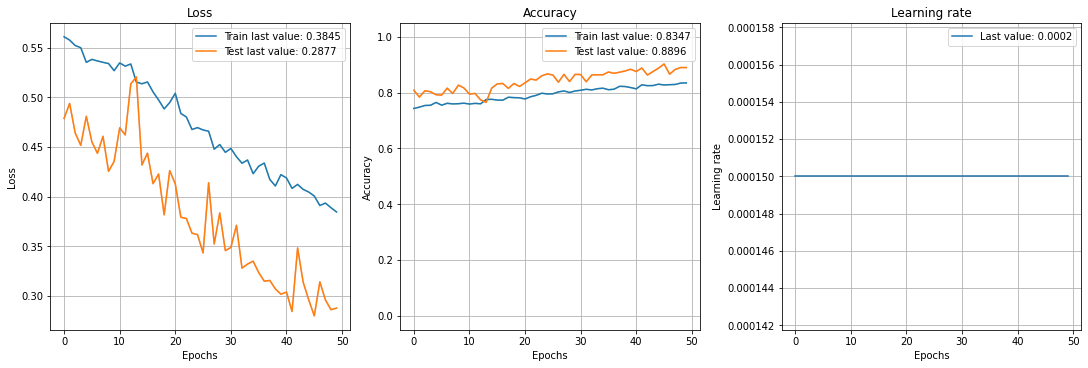

In [54]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt


show_history(history)
plot_history(history, path="standard.png")
plt.close()

In [52]:
2--


SyntaxError: ignored



```
# Ez kódként van formázva
```

# 2. futtatás HDL_COL

In [55]:
#

In [56]:
from sklearn.model_selection import train_test_split
x_train_hdl_col, x_valid_hdl_col, y_train_hdl_col, y_valid_hdl_col = train_test_split(X2, y_hdl_col, test_size=0.1, random_state=42) # X2-re módosítva 20220117 2023


In [57]:
model_name=_MODEL_TYPE_.upper()+"_hdlcol".upper()
callbacks = [callback_LR,
            
            #savemodela,
            ModelCheckpoint(filepath=model_name+"_LOSS_{loss:.5f}_VLOSS_{val_loss:.5f}_ACC_{accuracy:.4f}_VACC_{val_accuracy:.4f}_VF1.hdf5", monitor='loss',
                            verbose=1, save_best_only=True, mode='min')]


In [58]:
_MODEL_TYPE_="lstm"
model=model_dict[_MODEL_TYPE_]()

In [59]:
model.reset_states()

In [60]:
if _MODEL_TYPE_=="lstm":
    f1score=tfa.metrics.F1Score(num_classes=3)
    # Optimizer
    optimizer = RMSprop(learning_rate=0.01) #RMSprop
    loss =categorical_crossentropy 
    # Compilation
    #############
    model.compile(optimizer=optimizer,loss=loss, metrics=["accuracy",f1score])

In [ ]:
#model.load_weights("./LSTM_hdlcol_LOSS_0.67102_VLOSS_0.61605_ACC_0.7101_VACC_0.7260_.hdf5")

In [61]:
!rm *.hdf5

In [62]:
# Illesszük az adatra a modellt 
if _MODEL_TYPE_=="lstm":
        history=model.fit(
                x=x_train_hdl_col,
                y=y_train_hdl_col, 
                epochs=100, 
                batch_size=32,
                validation_data=(x_valid_hdl_col,y_valid_hdl_col) ,         
                callbacks=[callbacks]          
                )

lr--0.00015
Epoch 1/100
370/370 [==============================] - ETA: 0s - loss: 0.9887 - accuracy: 0.5546 - f1_score: 0.2711
Epoch 00001: loss improved from inf to 0.98869, saving model to LSTM_HDLCOL_LOSS_0.98869_VLOSS_0.97180_ACC_0.5546_VACC_0.5731_VF1.hdf5
370/370 [==============================] - 86s 216ms/step - loss: 0.9887 - accuracy: 0.5546 - f1_score: 0.2711 - val_loss: 0.9718 - val_accuracy: 0.5731 - val_f1_score: 0.2429 - lr: 1.5000e-04
lr--0.00015
Epoch 2/100
370/370 [==============================] - ETA: 0s - loss: 0.9736 - accuracy: 0.5698 - f1_score: 0.2429
Epoch 00002: loss improved from 0.98869 to 0.97357, saving model to LSTM_HDLCOL_LOSS_0.97357_VLOSS_0.96303_ACC_0.5698_VACC_0.5738_VF1.hdf5
370/370 [==============================] - 77s 208ms/step - loss: 0.9736 - accuracy: 0.5698 - f1_score: 0.2429 - val_loss: 0.9630 - val_accuracy: 0.5738 - val_f1_score: 0.2472 - lr: 1.5000e-04
lr--0.00015
Epoch 3/100
370/370 [==============================] - ETA: 0s - loss: 0

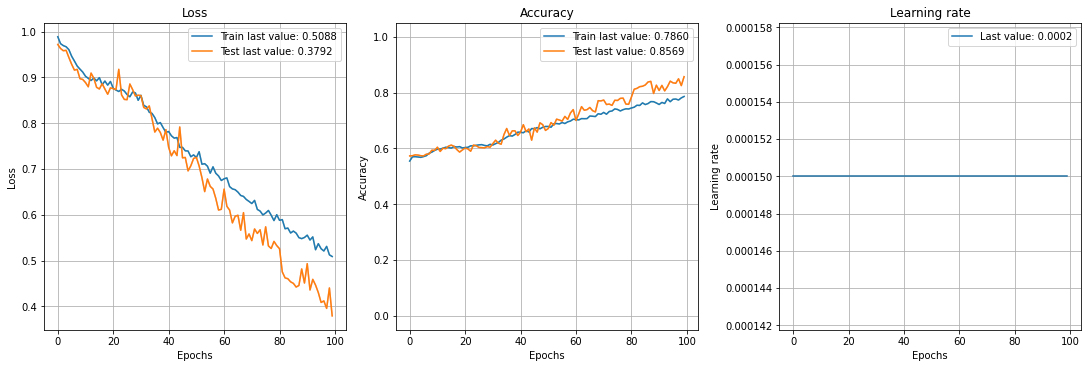

In [63]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt


show_history(history)
plot_history(history, path="standard.png")
plt.close()

#3. futtatás

In [64]:
!rm *.hdf5

In [65]:
from sklearn.model_selection import train_test_split
x_train_hemo, x_valid_hemo, y_train_hemo, y_valid_hemo = train_test_split(X2, y_hemo, test_size=0.1, random_state=42) # X2-re módosítva 20220117 2023


In [66]:
if _MODEL_TYPE_=="lstm":

    model_name=_MODEL_TYPE_.upper()+"_hemo"
    callbacks = [callback_LR,
            
            #savemodela,
            ModelCheckpoint(filepath=model_name+"_LOSS_{loss:.5f}_VLOSS_{val_loss:.5f}_ACC_{accuracy:.4f}_VACC_{val_accuracy:.4f}_.hdf5", monitor='loss', #{val_accuracy:.4f} VLOSS_{val_loss:.5f}
                            verbose=1, save_best_only=True, mode='min')]

In [67]:
_MODEL_TYPE_="lstm"
model=model_dict[_MODEL_TYPE_]()

In [ ]:
#model.load_weights("./LSTM_hdlcol_LOSS_0.67102_VLOSS_0.61605_ACC_0.7101_VACC_0.7260_.hdf5")

In [68]:

if _MODEL_TYPE_=="lstm":
    f1score=tfa.metrics.F1Score(num_classes=3)
    # Optimizer
    optimizer = RMSprop(learning_rate=0.01) #RMSprop
    loss =categorical_crossentropy 
    # Compilation
    #############
    model.compile(optimizer=optimizer,loss=loss, metrics=["accuracy",f1score])

In [71]:
# Illesszük az adatra a modellt 
if _MODEL_TYPE_=="lstm":
        history=model.fit(
                x=x_train_hemo,
                y=y_train_hemo, 
                epochs=50, 
                batch_size=32,
                validation_data=(x_valid_hemo,y_valid_hemo) ,         
                callbacks=[callbacks]          
                )

lr--0.00015
Epoch 1/50
370/370 [==============================] - ETA: 0s - loss: 0.2634 - accuracy: 0.9105 - f1_score: 0.6070
Epoch 00001: loss did not improve from 0.26220
370/370 [==============================] - 76s 206ms/step - loss: 0.2634 - accuracy: 0.9105 - f1_score: 0.6070 - val_loss: 0.2679 - val_accuracy: 0.9102 - val_f1_score: 0.6057 - lr: 1.5000e-04
lr--0.00015
Epoch 2/50
370/370 [==============================] - ETA: 0s - loss: 0.2582 - accuracy: 0.9117 - f1_score: 0.6141
Epoch 00002: loss improved from 0.26220 to 0.25816, saving model to LSTM_hemo_LOSS_0.25816_VLOSS_0.20844_ACC_0.9117_VACC_0.9307_.hdf5
370/370 [==============================] - 76s 205ms/step - loss: 0.2582 - accuracy: 0.9117 - f1_score: 0.6141 - val_loss: 0.2084 - val_accuracy: 0.9307 - val_f1_score: 0.6686 - lr: 1.5000e-04
lr--0.00015
Epoch 3/50
370/370 [==============================] - ETA: 0s - loss: 0.2574 - accuracy: 0.9135 - f1_score: 0.6182
Epoch 00003: loss improved from 0.25816 to 0.25744, 

KeyboardInterrupt: ignored

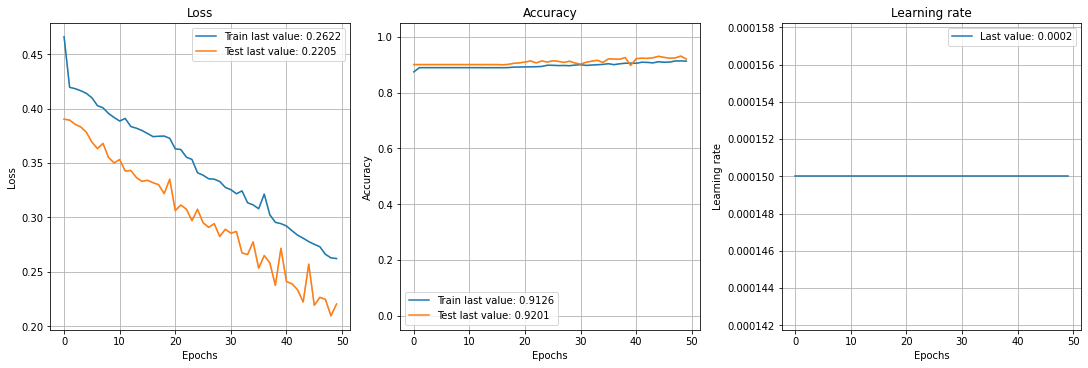

In [70]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt


show_history(history)
plot_history(history, path="standard.png")
plt.close()

In [72]:
!rm *.hdf5

#modell feldolgozás

In [ ]:
!rm *.hdf5

In [ ]:
fnameurl1="https://github.com/sipocz/Blood/raw/6f3464006158eff25b6c8867e6b32283a71093e5/weights/LSTM_LOSS_0.12323_VLOSS_0.08243_ACC_0.9542_VACC_0.9749_.hdf5"
fnameurl2="https://github.com/sipocz/Blood/raw/6f3464006158eff25b6c8867e6b32283a71093e5/weights/LSTM_hdlcol_LOSS_0.42891_VLOSS_0.33655_ACC_0.8199_VACC_0.8752_.hdf5"
fnameurl3="https://github.com/sipocz/Blood/raw/6f3464006158eff25b6c8867e6b32283a71093e5/weights/LSTM_hemo_LOSS_0.04712_VLOSS_0.01619_ACC_0.9831_VACC_0.9947_.hdf5"


In [ ]:
!wget $fnameurl1
!wget $fnameurl2
!wget $fnameurl3


In [ ]:
fname_col=fnameurl1.split("/")[-1]
fname_hdlcol=fnameurl2.split("/")[-1]
fname_hemo=fnameurl3.split("/")[-1]

    


In [73]:
fname_col="LSTM_COL_LOSS_0.38452_VLOSS_0.28775_ACC_0.8347_VACC_0.8896_.xhdf5"
fname_hdlcol="LSTM_HDLCOL_LOSS_0.50877_VLOSS_0.37922_ACC_0.7860_VACC_0.8569_VF1.xhdf5"
fname_hemo="LSTM_hemo_LOSS_0.21576_VLOSS_0.15734_ACC_0.9228_VACC_0.9475_.xhdf5"

In [74]:
fname_hdlcol

'LSTM_HDLCOL_LOSS_0.50877_VLOSS_0.37922_ACC_0.7860_VACC_0.8569_VF1.xhdf5'

In [75]:
model.load_weights(fname_col)

### ----

In [76]:
def calc_status(pred,dfcolumn):
    i=0
    for index,element in enumerate(pred):

        if element != dfcolumn.iloc[index]:
            #print(f"{index}")
            i +=1
    print(f"{i} hibás, {i/len(pred)*100} % hiba")        

In [77]:
# submission generation
!rm ./Updated_Test*

rm: cannot remove './Updated_Test*': No such file or directory


In [78]:
!wget https://github.com/sipocz/Blood/raw/ae2dd49b40364eeb9e1821b70aa87ff332aca170/orig/Updated_Test.csv

--2022-01-21 22:48:03--  https://github.com/sipocz/Blood/raw/ae2dd49b40364eeb9e1821b70aa87ff332aca170/orig/Updated_Test.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Blood/ae2dd49b40364eeb9e1821b70aa87ff332aca170/orig/Updated_Test.csv [following]
--2022-01-21 22:48:03--  https://raw.githubusercontent.com/sipocz/Blood/ae2dd49b40364eeb9e1821b70aa87ff332aca170/orig/Updated_Test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10371075 (9.9M) [text/plain]
Saving to: ‘Updated_Test.csv’

Updated_Test.csv    100%[===================>]   9.89M  --.-KB/s    in 0.04s   

2022-01-21 22:48:0

In [79]:
test_df=pd.read_csv("./Updated_Test.csv")
test_df.head()

test_df['hdl_cholesterol_human']=0
test_df["hemoglobin(hgb)_human"]=0
test_df["cholesterol_ldl_human"]=0

In [80]:
test_df.head()

,Reading_ID,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,...,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_KWUAQLRM,ID_2982,0.517951,0.520508,0.526852,0.531611,0.536816,0.543828,0.547761,0.554379,0.565622,0.575762,0.590253,0.600692,0.605104,0.608611,0.608169,0.606985,0.606590,0.603814,0.600409,0.597802,0.593389,0.589956,0.585429,0.583659,0.578307,0.574303,0.571248,0.570985,0.568520,0.566437,0.564261,0.563907,0.563427,0.564336,0.565472,0.567827,0.570957,0.572206,...,1.385020,1.373256,1.362781,1.345200,1.341810,1.333717,1.328438,1.313325,1.305895,1.293996,1.292892,1.285608,1.275789,1.267682,1.263906,1.259461,1.249615,1.244618,1.242537,1.238426,1.233983,1.235212,1.234433,1.234971,1.223950,1.235415,1.234605,1.226695,1.210430,1.214422,1.200332,1.198297,1.248182,0,0.0027,37.09,27.22,0,0,0
1,ID_FN8SIVJJ,ID_2982,0.517839,0.522367,0.525186,0.534661,0.541900,0.546180,0.551687,0.556753,0.566446,0.578208,0.591039,0.601620,0.605895,0.609568,0.610188,0.608635,0.607716,0.606237,0.601746,0.597047,0.594703,0.591059,0.587887,0.582815,0.578746,0.576693,0.573624,0.571268,0.569092,0.567672,0.565814,0.564862,0.564965,0.565536,0.565475,0.567822,0.571052,0.572733,...,1.387243,1.377109,1.362596,1.350712,1.343471,1.334255,1.320115,1.316767,1.305150,1.289700,1.286014,1.284353,1.274027,1.274710,1.263676,1.255490,1.256831,1.246188,1.236320,1.242136,1.234657,1.233898,1.234317,1.232710,1.238981,1.237033,1.237152,1.219627,1.216220,1.191416,1.202515,1.211942,1.242939,1,0.0027,37.20,27.17,0,0,0
2,ID_CI4TQCHI,ID_2982,0.517702,0.522018,0.527237,0.534374,0.541155,0.547152,0.549837,0.557513,0.566793,0.580574,0.592258,0.601226,0.608085,0.611143,0.611085,0.608700,0.608647,0.605048,0.601668,0.598030,0.595072,0.591417,0.587822,0.584160,0.579395,0.576524,0.574158,0.572215,0.569473,0.566740,0.565881,0.565431,0.565380,0.565508,0.566487,0.568591,0.570932,0.573199,...,1.381880,1.377176,1.360407,1.350644,1.368027,1.338249,1.322779,1.313343,1.300640,1.295481,1.286947,1.283352,1.276702,1.270998,1.262507,1.259525,1.253063,1.247183,1.245595,1.248910,1.239302,1.236558,1.237110,1.239622,1.228925,1.240135,1.238346,1.237193,1.208477,1.208721,1.187810,1.209599,1.175631,2,0.0027,37.30,27.07,0,0,0
3,ID_URJMKNU7,ID_2982,0.525008,0.527439,0.536871,0.539636,0.546555,0.553183,0.558826,0.563549,0.575675,0.587214,0.597155,0.606784,0.612443,0.615604,0.616249,0.615097,0.614963,0.611250,0.608559,0.603462,0.599570,0.597532,0.593608,0.588978,0.584560,0.581973,0.578872,0.576858,0.573706,0.571340,0.570279,0.570198,0.568850,0.569583,0.570136,0.571026,0.574510,0.575988,...,1.382891,1.377412,1.357813,1.352627,1.344537,1.334463,1.323303,1.313057,1.304806,1.299465,1.296792,1.286711,1.273948,1.272122,1.260676,1.255276,1.257032,1.244043,1.246127,1.238651,1.236244,1.243770,1.237752,1.229684,1.228355,1.234852,1.220159,1.218532,1.185708,1.196750,1.222484,1.177406,1.198399,3,0.0027,37.38,26.98,0,0,0
4,ID_HBJH67IS,ID_2982,0.520532,0.522683,0.526842,0.534634,0.539676,0.547488,0.552688,0.558355,0.568959,0.578905,0.591207,0.602236,0.607339,0.611220,0.610289,0.60955

In [81]:
test_id_list_tmp=test_df.donation_id.values
test_id_list=[]
for id in test_id_list_tmp:
    if id not in test_id_list:
        test_id_list.append(id)

# test adatok transformja !!!

In [82]:
df_test=test_df.drop(columns=["id","std"])

In [83]:
df_test.head()

,Reading_ID,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,...,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_KWUAQLRM,ID_2982,0.517951,0.520508,0.526852,0.531611,0.536816,0.543828,0.547761,0.554379,0.565622,0.575762,0.590253,0.600692,0.605104,0.608611,0.608169,0.606985,0.606590,0.603814,0.600409,0.597802,0.593389,0.589956,0.585429,0.583659,0.578307,0.574303,0.571248,0.570985,0.568520,0.566437,0.564261,0.563907,0.563427,0.564336,0.565472,0.567827,0.570957,0.572206,...,1.402706,1.391447,1.385020,1.373256,1.362781,1.345200,1.341810,1.333717,1.328438,1.313325,1.305895,1.293996,1.292892,1.285608,1.275789,1.267682,1.263906,1.259461,1.249615,1.244618,1.242537,1.238426,1.233983,1.235212,1.234433,1.234971,1.223950,1.235415,1.234605,1.226695,1.210430,1.214422,1.200332,1.198297,1.248182,37.09,27.22,0,0,0
1,ID_FN8SIVJJ,ID_2982,0.517839,0.522367,0.525186,0.534661,0.541900,0.546180,0.551687,0.556753,0.566446,0.578208,0.591039,0.601620,0.605895,0.609568,0.610188,0.608635,0.607716,0.606237,0.601746,0.597047,0.594703,0.591059,0.587887,0.582815,0.578746,0.576693,0.573624,0.571268,0.569092,0.567672,0.565814,0.564862,0.564965,0.565536,0.565475,0.567822,0.571052,0.572733,...,1.406884,1.395073,1.387243,1.377109,1.362596,1.350712,1.343471,1.334255,1.320115,1.316767,1.305150,1.289700,1.286014,1.284353,1.274027,1.274710,1.263676,1.255490,1.256831,1.246188,1.236320,1.242136,1.234657,1.233898,1.234317,1.232710,1.238981,1.237033,1.237152,1.219627,1.216220,1.191416,1.202515,1.211942,1.242939,37.20,27.17,0,0,0
2,ID_CI4TQCHI,ID_2982,0.517702,0.522018,0.527237,0.534374,0.541155,0.547152,0.549837,0.557513,0.566793,0.580574,0.592258,0.601226,0.608085,0.611143,0.611085,0.608700,0.608647,0.605048,0.601668,0.598030,0.595072,0.591417,0.587822,0.584160,0.579395,0.576524,0.574158,0.572215,0.569473,0.566740,0.565881,0.565431,0.565380,0.565508,0.566487,0.568591,0.570932,0.573199,...,1.405205,1.395040,1.381880,1.377176,1.360407,1.350644,1.368027,1.338249,1.322779,1.313343,1.300640,1.295481,1.286947,1.283352,1.276702,1.270998,1.262507,1.259525,1.253063,1.247183,1.245595,1.248910,1.239302,1.236558,1.237110,1.239622,1.228925,1.240135,1.238346,1.237193,1.208477,1.208721,1.187810,1.209599,1.175631,37.30,27.07,0,0,0
3,ID_URJMKNU7,ID_2982,0.525008,0.527439,0.536871,0.539636,0.546555,0.553183,0.558826,0.563549,0.575675,0.587214,0.597155,0.606784,0.612443,0.615604,0.616249,0.615097,0.614963,0.611250,0.608559,0.603462,0.599570,0.597532,0.593608,0.588978,0.584560,0.581973,0.578872,0.576858,0.573706,0.571340,0.570279,0.570198,0.568850,0.569583,0.570136,0.571026,0.574510,0.575988,...,1.403515,1.401420,1.382891,1.377412,1.357813,1.352627,1.344537,1.334463,1.323303,1.313057,1.304806,1.299465,1.296792,1.286711,1.273948,1.272122,1.260676,1.255276,1.257032,1.244043,1.246127,1.238651,1.236244,1.243770,1.237752,1.229684,1.228355,1.234852,1.220159,1.218532,1.185708,1.196750,1.222484,1.177406,1.198399,37.38,26.98,0,0,0
4,ID_HBJH67IS,ID_2982,0.520532,0.522683,0.526842,0.534634,0.539676,0.547488,0.552688,0.558355,0.568959,0.57

In [84]:
import numpy as np


In [85]:
func=["mean"]

In [86]:
cols=list(test_df.columns[2:172])
cols.append("temperature")
cols.append("humidity")
df_test_agg=pd.DataFrame()
for col in cols:
   
    result=test_df.groupby("donation_id").agg({col:func})
   
    df_test_agg[col]=result[col].iloc[:,0].values
df_test_agg['hdl_cholesterol_human']=0
df_test_agg["hemoglobin(hgb)_human"]=0
df_test_agg["cholesterol_ldl_human"]=0
df_test_agg["donation_id"]=result.index

In [87]:
df_test_agg.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
0,0.499920,0.504608,0.507929,0.519943,0.529032,0.536118,0.539690,0.541710,0.548590,0.560742,0.572227,0.582468,0.588715,0.591515,0.594874,0.596132,0.593921,0.589298,0.584735,0.580726,0.576208,0.573006,0.569422,0.566248,0.563401,0.560530,0.557530,0.556048,0.554297,0.553283,0.553039,0.552928,0.553576,0.555021,0.556709,0.559042,0.562160,0.567039,0.570653,0.574812,...,1.356969,1.349031,1.339057,1.330981,1.321598,1.312683,1.302362,1.293830,1.287395,1.278004,1.269806,1.261939,1.255188,1.248585,1.242906,1.237545,1.231696,1.225090,1.220767,1.214857,1.210767,1.208588,1.204434,1.200936,1.195675,1.185186,1.165124,1.140465,1.098607,1.065527,1.044592,1.035440,1.041868,1.027759,41.507000,40.839333,0,0,0,ID_1961
1,0.497758,0.498091,0.503083,0.507249,0.513739,0.521944,0.528798,0.533743,0.541470,0.551838,0.563810,0.576655,0.582322,0.585335,0.587424,0.588745,0.588792,0.586696,0.584191,0.581720,0.579240,0.576917,0.573680,0.570807,0.567496,0.564498,0.562600,0.560363,0.558279,0.557036,0.555625,0.554756,0.554074,0.554820,0.555545,0.557092,0.559098,0.562553,0.565149,0.568692,...,1.371568,1.363942,1.352835,1.344149,1.335032,1.323417,1.314956,1.306595,1.300673,1.289002,1.282047,1.274748,1.266909,1.260009,1.254758,1.247724,1.241378,1.236482,1.229732,1.225451,1.223462,1.218626,1.218425,1.217652,1.216998,1.218545,1.221584,1.221688,1.221872,1.219100,1.221694,1.221569,1.233970,1.227104,42.656500,39.675167,0,0,0,ID_2067
2,0.551436,0.553079,0.556722,0.560722,0.565583,0.570889,0.578668,0.585142,0.594233,0.610121,0.624801,0.637173,0.645108,0.649101,0.650867,0.651125,0.649180,0.647096,0.644185,0.640608,0.637902,0.635386,0.631675,0.625593,0.621151,0.616636,0.613757,0.610795,0.608635,0.607679,0.606690,0.606639,0.606520,0.608730,0.611250,0.614201,0.617529,0.621660,0.627568,0.632319,...,1.593780,1.583286,1.571732,1.558965,1.547836,1.536559,1.527750,1.517924,1.511536,1.496439,1.490027,1.480749,1.474753,1.464195,1.456410,1.449595,1.442547,1.436186,1.430327,1.426222,1.421095,1.415937,1.416552,1.414947,1.412894,1.416760,1.419018,1.422387,1.421566,1.422355,1.423502,1.433594,1.451166,1.433315,42.523833,41.728500,0,0,0,ID_2155
3,0.525926,0.528948,0.532222,0.540022,0.547279,0.554348,0.558680,0.563768,0.570031,0.583540,0.596124,0.607093,0.613002,0.616624,0.619543,0.620841,0.618805,0.614166,0.610156,0.605965,0.601668,0.598687,0.595476,0.592006,0.589363,0.586510,0.583951,0.582185,0.580720,0.579559,0.578678,0.578325,0.579207,0.580438,0.581965,0.584198,0.587096,0.591386,0.595273,0.599130,...,1.468861,1.456634,1.442976,1.431223,1.419422,1.407361,1.394721,1.383817,1.375959,1.362057,1.353425,1.343169,1.336277,1.328247,1.320609,1.312814,1.306433,1.298607,1.291746,1.287399,1.283340,1.279884,1.276867,1.275387,1.273222,1.271094,1.264453,1.251708,1.234305,1.212873,1.203968,1.196735,1.201349,1.192471,40.505833,43.938667,0,0,0,ID_2211
4,0.559814,0.559612,0.561561,0.565162,0.567556,0.572362,0.579762,0.587761,0.599415,0.6

In [88]:
test_transform=minmax.transform(df_test_agg.iloc[:,0:-1])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cholesterol_ldl_human
- hdl_cholesterol_human
- hemoglobin(hgb)_human
Feature names seen at fit time, yet now missing:
- hdl_cholesterol_human_x0_high
- hdl_cholesterol_human_x0_low
- hdl_cholesterol_human_x0_ok

  warnings.warn(message, FutureWarning)


In [89]:
X_test=test_transform[:,:-3]

In [90]:
X_test_list=reconstruct(X_test)
X_test_2=np.asarray(X_test_list)

In [91]:
model.load_weights(fname_col)
col_pred_test=model.predict(X_test_2)

model.load_weights(fname_hemo)
hemo_pred_test=model.predict(X_test_2)

model.load_weights(fname_hdlcol)
hdl_pred_test=model.predict(X_test_2)

In [92]:
hdl_pred_test

array([[1.77824900e-01, 7.97284126e-01, 2.48910058e-02],
       [4.09911312e-02, 9.47187841e-01, 1.18210232e-02],
       [2.77227256e-02, 4.35731150e-02, 9.28704202e-01],
       [2.07770523e-02, 2.14167520e-01, 7.65055418e-01],
       [1.28309019e-02, 1.67411775e-03, 9.85494971e-01],
       [6.80220500e-02, 3.05156022e-01, 6.26821995e-01],
       [2.68635922e-03, 9.45025623e-01, 5.22880107e-02],
       [5.12739224e-03, 9.61601675e-01, 3.32709812e-02],
       [3.45342666e-01, 5.20400666e-02, 6.02617264e-01],
       [2.03935038e-02, 8.89519155e-02, 8.90654564e-01],
       [2.09660851e-03, 3.72898370e-01, 6.25005066e-01],
       [3.71204346e-01, 3.10194446e-03, 6.25693738e-01],
       [3.93611044e-02, 6.57405019e-01, 3.03233922e-01],
       [1.81789249e-01, 1.03905499e-02, 8.07820141e-01],
       [8.45126621e-03, 3.27257323e-04, 9.91221428e-01],
       [2.33443524e-03, 1.83420796e-02, 9.79323506e-01],
       [2.62009855e-02, 1.36706309e-04, 9.73662317e-01],
       [2.13383269e-02, 8.65551

In [93]:
decoder=["high","low","ok"]

In [94]:
def hi_lo_ok_decoder(Xin,decoderlist):
    
    outlist=[]
    for Xini in Xin:
        Xini_list=list(Xini)
        maxi=max(Xini_list)
        maxpos=Xini_list.index(maxi)
        o1=decoderlist[maxpos]
        outlist.append(o1)
    return(outlist)


In [95]:
col_result=hi_lo_ok_decoder(col_pred_test,decoder)
hemo_result=hi_lo_ok_decoder(hemo_pred_test,decoder)
hdl_result=hi_lo_ok_decoder(hdl_pred_test,decoder)

In [96]:
o1=hi_lo_ok_decoder(hdl_pred_test,decoder)

In [97]:
outdf=pd.DataFrame()
outdf["Reading_ID"]=df_test_agg["donation_id"]
outdf["donation_id"]=df_test_agg.donation_id
outdf["hdl_cholesterol_human"]=hdl_result
outdf["hemoglobin(hgb)_human"]=hemo_result
outdf["cholesterol_ldl_human"]=col_result

outdf.set_index("Reading_ID",inplace=True)

In [98]:
df_test_agg.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
0,0.499920,0.504608,0.507929,0.519943,0.529032,0.536118,0.539690,0.541710,0.548590,0.560742,0.572227,0.582468,0.588715,0.591515,0.594874,0.596132,0.593921,0.589298,0.584735,0.580726,0.576208,0.573006,0.569422,0.566248,0.563401,0.560530,0.557530,0.556048,0.554297,0.553283,0.553039,0.552928,0.553576,0.555021,0.556709,0.559042,0.562160,0.567039,0.570653,0.574812,...,1.356969,1.349031,1.339057,1.330981,1.321598,1.312683,1.302362,1.293830,1.287395,1.278004,1.269806,1.261939,1.255188,1.248585,1.242906,1.237545,1.231696,1.225090,1.220767,1.214857,1.210767,1.208588,1.204434,1.200936,1.195675,1.185186,1.165124,1.140465,1.098607,1.065527,1.044592,1.035440,1.041868,1.027759,41.507000,40.839333,0,0,0,ID_1961
1,0.497758,0.498091,0.503083,0.507249,0.513739,0.521944,0.528798,0.533743,0.541470,0.551838,0.563810,0.576655,0.582322,0.585335,0.587424,0.588745,0.588792,0.586696,0.584191,0.581720,0.579240,0.576917,0.573680,0.570807,0.567496,0.564498,0.562600,0.560363,0.558279,0.557036,0.555625,0.554756,0.554074,0.554820,0.555545,0.557092,0.559098,0.562553,0.565149,0.568692,...,1.371568,1.363942,1.352835,1.344149,1.335032,1.323417,1.314956,1.306595,1.300673,1.289002,1.282047,1.274748,1.266909,1.260009,1.254758,1.247724,1.241378,1.236482,1.229732,1.225451,1.223462,1.218626,1.218425,1.217652,1.216998,1.218545,1.221584,1.221688,1.221872,1.219100,1.221694,1.221569,1.233970,1.227104,42.656500,39.675167,0,0,0,ID_2067
2,0.551436,0.553079,0.556722,0.560722,0.565583,0.570889,0.578668,0.585142,0.594233,0.610121,0.624801,0.637173,0.645108,0.649101,0.650867,0.651125,0.649180,0.647096,0.644185,0.640608,0.637902,0.635386,0.631675,0.625593,0.621151,0.616636,0.613757,0.610795,0.608635,0.607679,0.606690,0.606639,0.606520,0.608730,0.611250,0.614201,0.617529,0.621660,0.627568,0.632319,...,1.593780,1.583286,1.571732,1.558965,1.547836,1.536559,1.527750,1.517924,1.511536,1.496439,1.490027,1.480749,1.474753,1.464195,1.456410,1.449595,1.442547,1.436186,1.430327,1.426222,1.421095,1.415937,1.416552,1.414947,1.412894,1.416760,1.419018,1.422387,1.421566,1.422355,1.423502,1.433594,1.451166,1.433315,42.523833,41.728500,0,0,0,ID_2155
3,0.525926,0.528948,0.532222,0.540022,0.547279,0.554348,0.558680,0.563768,0.570031,0.583540,0.596124,0.607093,0.613002,0.616624,0.619543,0.620841,0.618805,0.614166,0.610156,0.605965,0.601668,0.598687,0.595476,0.592006,0.589363,0.586510,0.583951,0.582185,0.580720,0.579559,0.578678,0.578325,0.579207,0.580438,0.581965,0.584198,0.587096,0.591386,0.595273,0.599130,...,1.468861,1.456634,1.442976,1.431223,1.419422,1.407361,1.394721,1.383817,1.375959,1.362057,1.353425,1.343169,1.336277,1.328247,1.320609,1.312814,1.306433,1.298607,1.291746,1.287399,1.283340,1.279884,1.276867,1.275387,1.273222,1.271094,1.264453,1.251708,1.234305,1.212873,1.203968,1.196735,1.201349,1.192471,40.505833,43.938667,0,0,0,ID_2211
4,0.559814,0.559612,0.561561,0.565162,0.567556,0.572362,0.579762,0.587761,0.599415,0.6

In [99]:
outdf=pd.DataFrame()
outdf["Reading_ID"]=df_test_agg["donation_id"]
outdf["donation_id"]=df_test_agg["donation_id"]

outdf["hemoglobin(hgb)_human"]=hemo_result
outdf["cholesterol_ldl_human"]=col_result
outdf["hdl_cholesterol_human"]=hdl_result

outdf.set_index("Reading_ID",inplace=True)

In [100]:
outdf.head(33)

,donation_id,hemoglobin(hgb)_human,cholesterol_ldl_human,hdl_cholesterol_human
Reading_ID,,,,
ID_1961,ID_1961,ok,ok,low
ID_2067,ID_2067,ok,ok,low
ID_2155,ID_2155,high,ok,ok
ID_2211,ID_2211,ok,ok,ok
ID_2327,ID_2327,ok,high,ok
ID_2436,ID_2436,ok,ok,ok
ID_2441,ID_2441,ok,ok,low
ID_2493,ID_2493,low,low,low
ID_2495,ID_2495,ok,ok,ok


In [101]:
gen_outdf=pd.DataFrame()
c1=[]
c2=[]
for i in outdf.index:
    rec1=outdf.loc[i,"hdl_cholesterol_human"]
    rec2=outdf.loc[i,"hemoglobin(hgb)_human"]
    rec3=outdf.loc[i,"cholesterol_ldl_human"]
    c1.append(outdf.loc[i,"donation_id"]+"_"+"hdl_cholesterol_human")
    c2.append(rec1)
    c1.append(outdf.loc[i,"donation_id"]+"_"+"hemoglobin(hgb)_human")
    c2.append(rec2)
    c1.append(outdf.loc[i,"donation_id"]+"_"+"cholesterol_ldl_human")
    c2.append(rec3)

In [102]:
gen_outdf["Donation_ID"]=c1
gen_outdf["target"]=c2

In [111]:
gen_outdf.head(23)

,target
Donation_ID,
ID_1961_hdl_cholesterol_human,low
ID_1961_hemoglobin(hgb)_human,ok
ID_1961_cholesterol_ldl_human,ok
ID_2067_hdl_cholesterol_human,low
ID_2067_hemoglobin(hgb)_human,ok
ID_2067_cholesterol_ldl_human,ok
ID_2155_hdl_cholesterol_human,ok
ID_2155_hemoglobin(hgb)_human,high
ID_2155_cholesterol_ldl_human,ok


In [104]:
def create_submission_name(project):
    from datetime  import datetime
    strdate=datetime.now().strftime("%Y%m%d_%H%M%S")
    out=project+"_"+"submission"+"_"+strdate+".csv"
    return(out)

In [105]:
gen_outdf.set_index("Donation_ID", inplace=True)

In [106]:
submission_fname=create_submission_name("BloodAI")

In [107]:
submission_fname

'BloodAI_submission_20220121_224921.csv'

In [108]:
gen_outdf.to_csv(submission_fname,index=True)

In [110]:
!head $submission_fname

Donation_ID,target
ID_1961_hdl_cholesterol_human,low
ID_1961_hemoglobin(hgb)_human,ok
ID_1961_cholesterol_ldl_human,ok
ID_2067_hdl_cholesterol_human,low
ID_2067_hemoglobin(hgb)_human,ok
ID_2067_cholesterol_ldl_human,ok
ID_2155_hdl_cholesterol_human,ok
ID_2155_hemoglobin(hgb)_human,high
ID_2155_cholesterol_ldl_human,ok
